# Data Analysis

In [84]:
#Necessary imports for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [85]:
#Loading dataset
dataset = pd.read_csv('train.csv')

In [86]:
dataset.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [87]:
dataset.shape

(82657, 12)

In [88]:
#Number of varieties or classes of wine
len(dataset['variety'].unique())

28

## Missing Values

In [89]:
#Check the percentages of missing values
na_features = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]
for feature in na_features :
    print(feature,': ',np.round(dataset[feature].isnull().mean(),4), '% missing values')

user_name :  0.2346 % missing values
country :  0.0004 % missing values
designation :  0.2861 % missing values
price :  0.0674 % missing values
province :  0.0004 % missing values
region_1 :  0.1543 % missing values
region_2 :  0.5651 % missing values


### Removing columns with high nan values

In [90]:
#Drop columns with high missing values
dataset = dataset.drop(columns={'region_2','region_1','designation','user_name'},axis=1)

In [91]:
len(dataset['review_title'].unique())

76983

In [92]:
#review_title contains very high number of unique categories, hence does not provide any useful info.
dataset = dataset.drop(columns='review_title',axis=1)

In [93]:
#After Column removal
dataset.head()

,country,review_description,points,price,province,winery,variety
0,Australia,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,Australia Other,Andrew Peace,Chardonnay
1,US,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,North by Northwest,Red Blend
2,Italy,Barolo Conca opens with inky dark concentratio...,94,80.0,Piedmont,Renato Ratti,Nebbiolo
3,France,It's impressive what a small addition of Sauvi...,87,22.0,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,"This ripe, sweet wine is rich and full of drie...",88,33.0,France Other,Château du Cèdre,Malbec


In [143]:
#Number of entries for each variety
l=[]
for _ in range(len(dataset['variety'].unique())):
    a = dataset[dataset['variety'] ==dataset['variety'].unique()[_] ].shape[0]
    l.append(a)
    print(' {} : {}'.format(dataset['variety'].unique()[_],a))

 Chardonnay : 9400
 Red Blend : 7158
 Nebbiolo : 2242
 Bordeaux-style White Blend : 850
 Malbec : 2119
 Cabernet Sauvignon : 7550
 Zinfandel : 2209
 Pinot Noir : 10584
 Sauvignon Blanc : 4007
 Gamay : 816
 Grüner Veltliner : 1055
 Bordeaux-style Red Blend : 5497
 Sangiovese : 2165
 Syrah : 3316
 White Blend : 1890
 Cabernet Franc : 1094
 Portuguese Red : 1969
 Portuguese White : 896
 Rhône-style Red Blend : 1182
 Rosé : 2830
 Champagne Blend : 1133
 Merlot : 2470
 Riesling : 4147
 Sparkling Blend : 1739
 Pinot Grigio : 873
 Tempranillo : 1447
 Pinot Gris : 1145
 Gewürztraminer : 839


In [146]:
v = dataset['variety'].unique()

## Numerical Features

In [94]:
#Features that contain numerical data
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
numerical_features

['points', 'price']

### Outliers

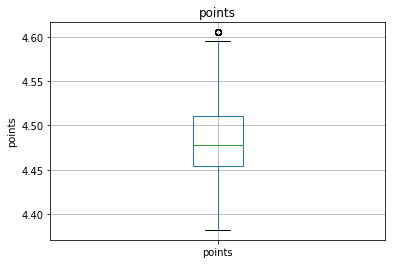

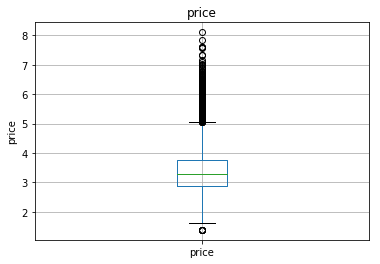

In [116]:
#A Visual representation of feature values that fall out of 
for feature in numerical_features:    
    data=dataset.copy()
    if 0 in data[feature].unique():  #log cannot take 0
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

The Price has a low median, but there are significant amount of outliers

### Missing values in numerical features

In [96]:
#Percentage of missing values in numerical features
numerical_with_nan = [feature for feature in numerical_features if  dataset[feature].isnull().sum()>1]

for feature in numerical_with_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

price: 0.0674% missing values


In [97]:
#Replace missing values in "Price" feature with the median of the data(not mean due to significant number of outliers)
for feature in numerical_with_nan:
        median_value = dataset[feature].median()
        dataset[feature].fillna(median_value,inplace = True)
        
dataset[numerical_with_nan].isnull().sum()

price    0
dtype: int64

## Categorical Features

In [98]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O' and feature not in ['review_description']]
categorical_features

['country', 'province', 'winery', 'variety']

In [99]:
#Number of categories in each categorical features
for feature in categorical_features:
    print('The feature is {} and the of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is country and the of categories are 39
The feature is province and the of categories are 359
The feature is winery and the of categories are 13786
The feature is variety and the of categories are 28


In [100]:
#Drop entries with nan values
dataset = dataset.dropna()
dataset.shape
#Only a few samples have been lost due to nan values, so we can proceed

(82622, 7)

In [101]:
#reset the indexes to compensate the removal of nan containing entries
dataset.reset_index(inplace=True)

In [102]:
dataset_2= dataset.copy()

### Enumeration of Categorical features

In [103]:
dataset_2['wine_type'] = dataset_2['variety']

In [104]:
#Enumeration of categorical_features 

for feature in categorical_features  :
    labels_ordered = dataset_2.groupby(feature)['price'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    dataset_2[feature] = dataset_2[feature].map(labels_ordered)
    

In [105]:
labels_ordered = {v: k for k, v in labels_ordered.items()}

In [106]:
import pickle
f = open("dictionary.pkl","wb")
pickle.dump(labels_ordered,f)
f.close()

In [107]:
dataset_2.head()

,index,country,review_description,points,price,province,winery,variety,wine_type
0,0,26,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,42,549,17,Chardonnay
1,1,32,This wine is near equal parts Syrah and Merlot...,89,15.0,274,8499,20,Red Blend
2,2,35,Barolo Conca opens with inky dark concentratio...,94,80.0,345,13091,26,Nebbiolo
3,3,33,It's impressive what a small addition of Sauvi...,87,22.0,182,9049,15,Bordeaux-style White Blend
4,4,33,"This ripe, sweet wine is rich and full of drie...",88,33.0,99,12011,13,Malbec


In [108]:
dataset_2[['review_description','variety','wine_type']].head()

,review_description,variety,wine_type
0,"Classic Chardonnay aromas of apple, pear and h...",17,Chardonnay
1,This wine is near equal parts Syrah and Merlot...,20,Red Blend
2,Barolo Conca opens with inky dark concentratio...,26,Nebbiolo
3,It's impressive what a small addition of Sauvi...,15,Bordeaux-style White Blend
4,"This ripe, sweet wine is rich and full of drie...",13,Malbec


In [109]:
dataset_2[['review_description','variety','wine_type']].to_csv('review_data.csv',index=False)

# Data Visualization

In [110]:
dataset[dataset['price']==dataset['price'].max()]

,index,country,review_description,points,price,province,winery,variety
60104,60131,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet,Bordeaux-style Red Blend


In [111]:
dataset[dataset['points']==dataset['points'].max()]

,index,country,review_description,points,price,province,winery,variety
2895,2897,US,Initially a rather subdued Frog; as if it has ...,100,80.0,Washington,Cayuse,Syrah
3219,3221,France,"Almost black in color, this stunning wine is g...",100,1500.0,Bordeaux,Château Lafite Rothschild,Bordeaux-style Red Blend
11697,11704,Italy,"A perfect wine from a classic vintage, the 200...",100,460.0,Tuscany,Tenuta dell'Ornellaia,Merlot
19983,19993,France,This is the finest Cheval Blanc for many years...,100,1500.0,Bordeaux,Château Cheval Blanc,Bordeaux-style Red Blend
20172,20182,France,"Full of ripe fruit, opulent and concentrated, ...",100,848.0,Bordeaux,Château Haut-Brion,Bordeaux-style White Blend
27168,27179,France,"This is a magnificently solid wine, initially ...",100,150.0,Bordeaux,Château Léoville Barton,Bordeaux-style Red Blend
31559,31572,Italy,"This gorgeous, fragrant wine opens with classi...",100,550.0,Tuscany,Biondi Santi,Sangiovese
35477,35492,France,"A hugely powerful wine, full of dark, brooding...",100,359.0,Bordeaux,Château Léoville Las Cases,Bordeaux-style Red Blend
41344,41362,US,Tasted in a flight of great and famous Napa wi...,100,200.0,California,Cardinale,Cabernet Sauvignon
46843,46864,France,This new release from a great vintage for Char...,100,617.0,Champagne,Salon,Chardonnay


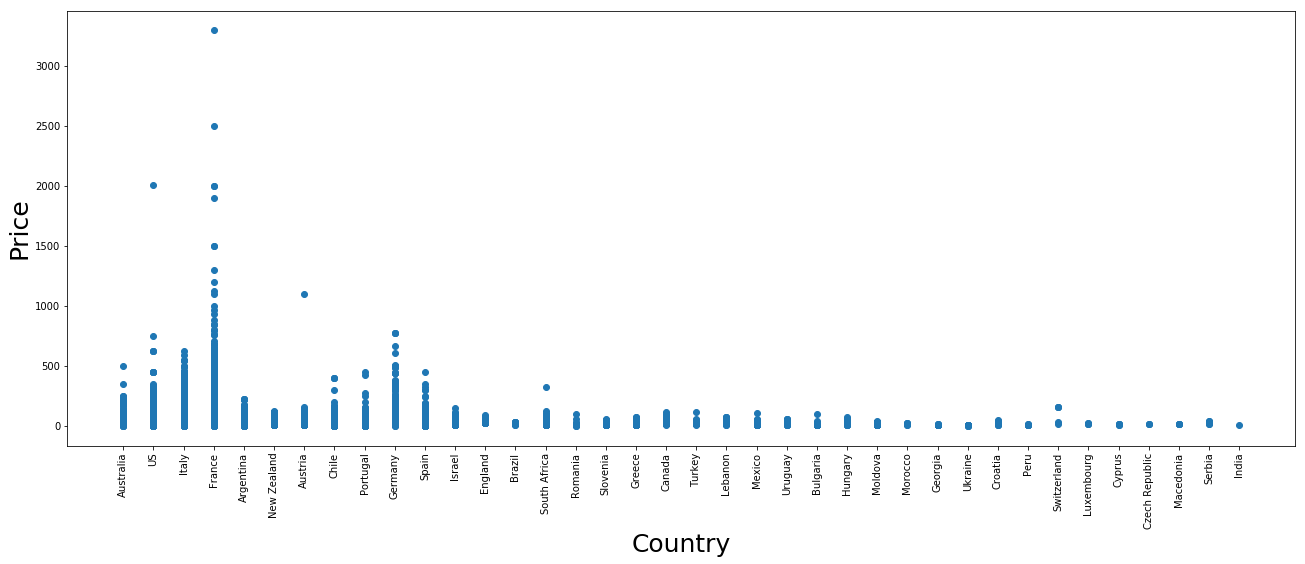

In [112]:
fig = plt.figure(figsize=(22,8))
plt.scatter(x=dataset['country'],y=dataset['price'])
plt.xticks(rotation='vertical')
plt.xlabel('Country',size=25)
plt.ylabel('Price',size=25)
plt.show()
fig.suptitle('Relation between Country and Price',size=25)

fig.savefig('Country vs Price.jpg')

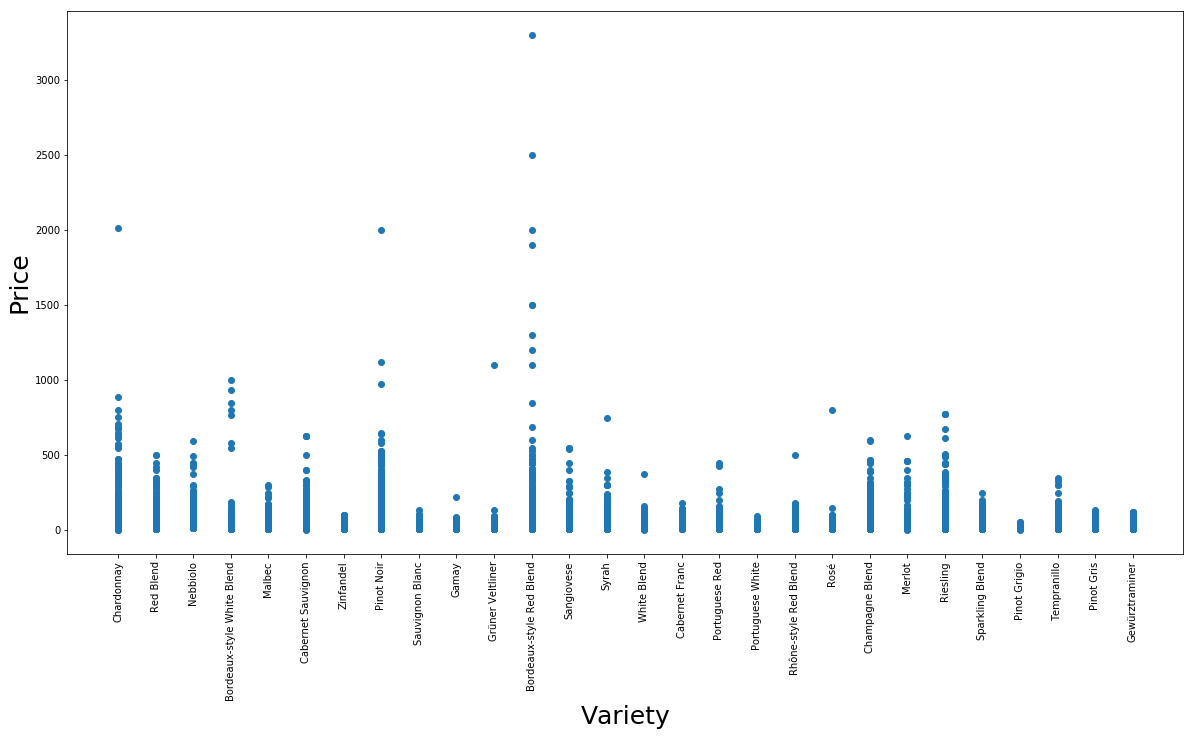

In [113]:
fig = plt.figure(figsize=(20,10))
plt.scatter(x=dataset['variety'],y=dataset['price'])
plt.xticks(rotation='vertical')
plt.xlabel('Variety',size=25)
plt.ylabel('Price',size=25)
plt.show()
fig.suptitle('Relation between Variety and Price',size=25)

fig.savefig('Variety vs Price.jpg')

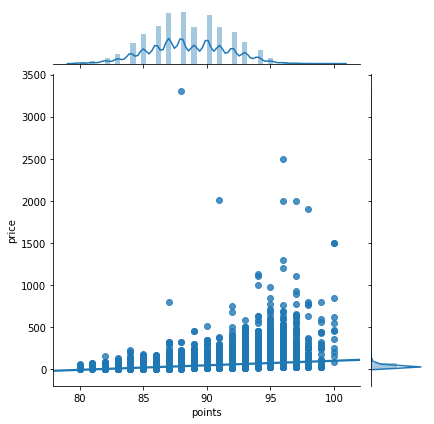

In [114]:
fig = sns.jointplot(x=dataset['points'],y=dataset['price'],kind = 'reg')
fig.savefig('Points vs Price.jpg')

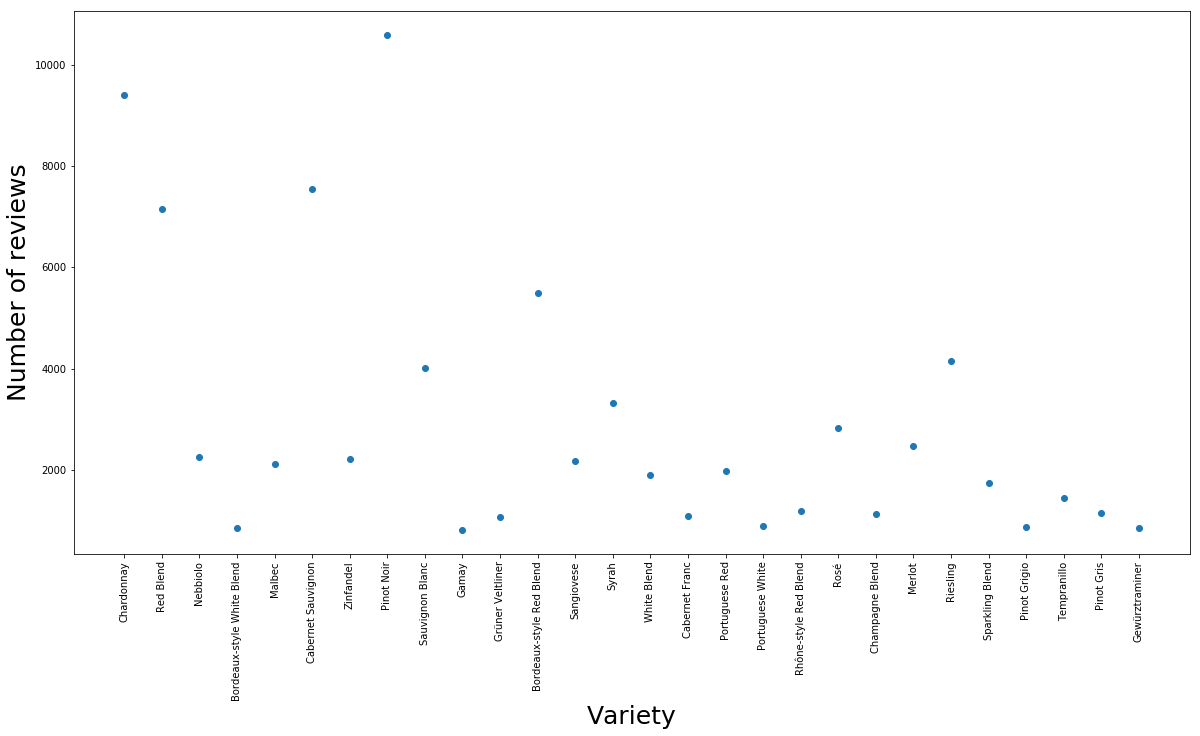

In [151]:
fig = plt.figure(figsize=(20,10))
plt.scatter(x=v,y=l)
plt.xticks(rotation='vertical')
plt.xlabel('Variety',size=25)
plt.ylabel('Number of reviews',size=25)
plt.show()
fig.suptitle('Relation between Number of reviews and variety',size=25)

fig.savefig('Variety vs num_reviews.jpg')